In [ ]:
import pandas as pd
import numpy as np

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [ ]:
volunteer = pd.read_csv('/content/leaf_dataset.csv')
volunteer.head(6)

,Class(species),specimen number,Eccentricity,Aspect Ratio,Elongation,Solidity,Stochastic Convexity,Isoperimetric Factor,Maximal Indentation Depth,Lobedness,Average Intensity,Average Contrast,Smoothness,Third moment,Uniformity,Entropy
0,1,1,0.72694,1.4742,0.32396,0.98535,1.00000,0.83592,0.004657,0.003947,0.047790,0.127950,0.016108,0.005232,0.000275,1.17560
1,1,2,0.74173,1.5257,0.36116,0.98152,0.99825,0.79867,0.005242,0.005002,0.024160,0.090476,0.008119,0.002708,0.000075,0.69659
2,1,3,0.76722,1.5725,0.38998,0.97755,1.00000,0.80812,0.007457,0.010121,0.011897,0.057445,0.003289,0.000921,0.000038,0.44348
3,1,4,0.73797,1.4597,0.35376,0.97566,1.00000,0.81697,0.006877,0.008607,0.015950,0.065491,0.004271,0.001154,0.000066,0.58785
4,1,5,0.82301,1.7707,0.44462,0.97698,1.00000,0.75493,0.007428,0.010042,0.007938,0.045339,0.002051,0.000560,0.000023,0.34214
5,1,6,0.72997,1.4892,0.34284,0.98755,1.00000,0.84482,0.004945,0.004451,0.010487,0.058528,0.003414,0.001125,0.000025,0.34068


In [ ]:
type(volunteer)

pandas.core.frame.DataFrame

In [ ]:
volunteer.isnull().sum()

volunteer[['Elongation', 'Maximal Indentation Depth', 'Lobedness', 'Average Contrast', 'Entropy']]

,Elongation,Maximal Indentation Depth,Lobedness,Average Contrast,Entropy
0,0.32396,0.004657,0.003947,0.127950,1.17560
1,0.36116,0.005242,0.005002,0.090476,0.69659
2,0.38998,0.007457,0.010121,0.057445,0.44348
3,0.35376,0.006877,0.008607,0.065491,0.58785
4,0.44462,0.007428,0.010042,0.045339,0.34214
...,...,...,...,...,...
335,0.81725,0.091860,1.535800,0.208610,2.02810
336,0.75319,0.078996,1.135800,0.218300,2.40590
337,0.78147,0.089763,1.466400,0.207030,1.69350
338,0.71532,0.113370,2.339400,0.135850,1.15260


In [ ]:
impute = SimpleImputer(missing_values = np.nan, strategy = 'mean')

impute.fit(volunteer[['Elongation']])
volunteer['Elongation'] = impute.transform(volunteer[['Elongation']])


impute.fit(volunteer[['Maximal Indentation Depth']])
volunteer['Maximal Indentation Depth'] = impute.transform(volunteer[['Maximal Indentation Depth']])


impute.fit(volunteer[['Lobedness']])
volunteer['Lobedness'] = impute.transform(volunteer[['Lobedness']])


impute.fit(volunteer[['Average Contrast']])
volunteer['Average Contrast'] = impute.transform(volunteer[['Average Contrast']])

impute.fit(volunteer[['Entropy']])
volunteer['Entropy'] = impute.transform(volunteer[['Entropy']])


volunteer.isnull().sum()

Class(species)               0
specimen number              0
Eccentricity                 0
Aspect Ratio                 0
Elongation                   0
Solidity                     0
Stochastic Convexity         0
Isoperimetric Factor         0
Maximal Indentation Depth    0
Lobedness                    0
Average Intensity            0
Average Contrast             0
Smoothness                   0
Third moment                 0
Uniformity                   0
Entropy                      0
dtype: int64

In [ ]:
x = volunteer.iloc[:, :-1]
x

y = volunteer.iloc[:, -1]
y

y1 = volunteer[['Class(species)']]
y1

,Class(species)
0,1
1,1
2,1
3,1
4,1
...,...
335,36
336,36
337,36
338,36


In [ ]:
scaler = MinMaxScaler()

scaler.fit(x)

X_scaled = scaler.transform(x)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, y1, test_size = 0.25, random_state = 45, stratify = y1)

model = LogisticRegression()
model.fit(X_train, Y_train)
predictions = model.predict(X_test)

logisticreg = accuracy_score(Y_test, predictions)
print("Logistic Regression accuracy: {:.3f}".format(logisticreg))

Logistic Regression accuracy: 0.647


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
from sklearn.tree import DecisionTreeClassifier

model_decision_tree = DecisionTreeClassifier(criterion = 'entropy', random_state=1)
model_decision_tree.fit(X_train, Y_train)
predictions = model_decision_tree.predict(X_test)

decisiontree = accuracy_score(Y_test, predictions)
print("Decision Tree accuracy: {:.3f}".format(decisiontree))

Decision Tree accuracy: 0.965


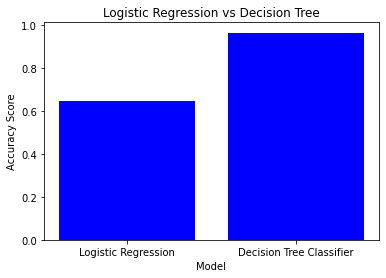

In [ ]:
import matplotlib.pyplot as plt

data = {'Logistic Regression':logisticreg, 'Decision Tree Classifier':decisiontree}
plt.bar(list(data.keys()), list(data.values()), color = 'blue')

plt.xlabel("Model")
plt.ylabel("Accuracy Score")
plt.title("Logistic Regression vs Decision Tree")
plt.show()